In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fun_py as fp



In [2]:
train= pd.read_csv("../input/credit-score-prediction/CreditScore_train.csv")
test= pd.read_csv("../input/credit-score-prediction/CreditScore_test.csv")

In [3]:
print("Train Data Shape b4 adding target col : ",train.shape)
print("Test Data Shape b4 adding target col : ",test.shape)

Train Data Shape b4 adding target col :  (80000, 305)
Test Data Shape b4 adding target col :  (20000, 305)


In [4]:
train["source"] = "train"
test["source"] = "test"
print("Train Data Shape aftr adding target col : ",train.shape)
print("Test Data Shape aftr adding target col : ",test.shape)

Train Data Shape aftr adding target col :  (80000, 306)
Test Data Shape aftr adding target col :  (20000, 306)


In [5]:
df = pd.concat([train,test])

In [6]:
fp.data_duplicates(df,0)

Number of Duplicate Records 0


In [7]:
fp.data_isna(df)

Number of NA in Column x002 : 21432
Number of NA in Column x003 : 21432
Number of NA in Column x004 : 21424
Number of NA in Column x005 : 6110
Number of NA in Column x041 : 36872
Number of NA in Column x044 : 19674
Number of NA in Column x045 : 19674
Number of NA in Column x057 : 36872
Number of NA in Column x058 : 36872
Number of NA in Column x098 : 80681
Number of NA in Column x148 : 41785
Number of NA in Column x155 : 79051
Number of NA in Column x162 : 66481
Number of NA in Column x222 : 36987
Number of NA in Column x223 : 37069
Number of NA in Column x234 : 19110
Number of NA in Column x235 : 20083
Number of NA in Column x237 : 36744
Number of NA in Column x238 : 36744
Number of NA in Column x239 : 36744
Number of NA in Column x242 : 93339
Number of NA in Column x253 : 66333
Number of NA in Column x255 : 76913
Number of NA in Column x256 : 76913
Number of NA in Column x257 : 76913
Number of NA in Column x259 : 77432
Number of NA in Column x265 : 66461
Number of NA in Column x266 :

In [8]:

#fp.data_groupcols(df)

In [9]:
df.shape

(100000, 306)

In [10]:
lst=[]
lst=df.columns

In [11]:
row=df.shape[0]
cols=[]

In [12]:
len(cols)

0

In [13]:
[cols.append(i) for i in lst if df[i].isnull().sum()/row*100 > 70 ]

[None, None, None, None, None, None, None, None, None, None]

In [14]:
len(cols)

10

In [15]:
cols

['x098',
 'x155',
 'x242',
 'x255',
 'x256',
 'x257',
 'x259',
 'x295',
 'x302',
 'x304']

Removing columns which has more than 70% of NA Values . 10 cols (x098,x155,x242,x255,x256,x257,x259,x295,x302,x304) are removed

In [16]:
data=df.drop(cols,axis=1)

In [17]:
data.shape

(100000, 296)

In [18]:
fp.data_nullcols(data,0)

Column Name : x002 --> Null Values : 21432
Column Name : x003 --> Null Values : 21432
Column Name : x004 --> Null Values : 21424
Column Name : x005 --> Null Values : 6110
Column Name : x041 --> Null Values : 36872
Column Name : x044 --> Null Values : 19674
Column Name : x045 --> Null Values : 19674
Column Name : x057 --> Null Values : 36872
Column Name : x058 --> Null Values : 36872
Column Name : x148 --> Null Values : 41785
Column Name : x162 --> Null Values : 66481
Column Name : x222 --> Null Values : 36987
Column Name : x223 --> Null Values : 37069
Column Name : x234 --> Null Values : 19110
Column Name : x235 --> Null Values : 20083
Column Name : x237 --> Null Values : 36744
Column Name : x238 --> Null Values : 36744
Column Name : x239 --> Null Values : 36744
Column Name : x253 --> Null Values : 66333
Column Name : x265 --> Null Values : 66461
Column Name : x266 --> Null Values : 66461
Column Name : x267 --> Null Values : 66461
Column Name : x268 --> Null Values : 67253
Column Name 

In [19]:
#fp.data_groupcols(data)

In [20]:
pd.options.display.max_rows = 4000

colg=data.corr()['y'].sort_values() > 0.3
coll=data.corr()['y'].sort_values() <-0.3

In [21]:
data.shape

(100000, 296)

In [22]:
lstg=[]
lstl=[]
lstg.clear()
lstg.clear()
len(lstg)
len(lstl)
        

0

In [23]:
[lstg.append(i) for i,j in colg.items() if j == True]
[lstl.append(i) for i,j in coll.items() if j == True]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [24]:
print("Length of lstl",len(lstl))
print("Length of lstg",len(lstg))

Length of lstl 22
Length of lstg 40


In [25]:
lstd=[]
#lstd=lstg+lstl
print("Length of lstd",len(lstd))


Length of lstd 0


In [26]:
lstd=lstg+lstl
print("Length of lstd",len(lstd))

Length of lstd 62


In [27]:
data_cols=data.columns

In [28]:
#data.corr('x002')['y']
#data['x002'].corr(data['y'])
#df['A'].corr(df['B'])
#pd.options.display.max_columns = 4000
#data.corr()

In [29]:
cor_target = abs(data.corr()["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.3]
relevant_features

x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
x009    0.001522
x010    0.043654
x011    0.113111
x012    0.117558
x013    0.178163
x016    0.194172
x021    0.242804
x024    0.059221
x026    0.212508
x029    0.217832
x031    0.280099
x032    0.077719
x033    0.112868
x034    0.191694
x035    0.254842
x037    0.091270
x038    0.125037
x039    0.216553
x040    0.291714
x042    0.293363
x044    0.212458
x045    0.145432
x048    0.195027
x049    0.137282
x050    0.096114
x051    0.059743
x052    0.029612
x053    0.012722
x054    0.022510
x055    0.091911
x060    0.001973
x061    0.177372
x062    0.293974
x066    0.212327
x068    0.059887
x069    0.106879
x070    0.138074
x071    0.183339
x072    0.204699
x073    0.284965
x074    0.175537
x075    0.260677
x076    0.192416
x077    0.047028
x078    0.090930
x079    0.113628
x080    0.161110
x081    0.178198
x082    0.088651
x083    0.039574
x084    0.033738
x085    0.041799
x086    0.068299
x087    0.0785

In [30]:
 lst_key=[]

In [31]:
for i,j in relevant_features.items():
    lst_key.append(i)
#print(lst_key.count())


In [32]:
len(lst_key)

229

In [33]:
#lstd

In [34]:
#lstd.remove('y')
m_cols=[]

In [35]:
lstd1= ['x017','x047','x015','x043','x251','x248','x018','x019','x028','x020','x004','x027','x030','x224','x260','x261','x229','x262','x247','x250','x246','x245','x014','x023','x002','x239','x025','x225','x237','x244','x046','x228','x226','x249','x227','x022','x236','x005','x235','x041','x057','x058','x287','x148','x253','x059','x065','x064','x162','x297','x293','x063','x168','x173','x056','x278','x036','x172','x277','x276','x099']

In [36]:
len(lstd1)

61

In [37]:
drop_cols=['x062','x066','x067','x068','x069','x070','x071','x072','x073','x074','x075','x076','x077','x078','x079','x080','x081','x082','x083','x084','x085','x086','x087','x088','x089','x090','x091','x092','x093','x094','x095','x096','x097','x100','x101','x102','x103','x104','x105','x106','x107','x108','x109','x110','x111','x112','x113','x114','x115','x116','x117','x118','x119','x120','x121','x122','x123','x124','x125','x126','x127','x128','x129','x130','x131','x132','x133','x134','x135','x136','x137','x138','x139','x140','x141','x142','x143','x144','x145','x146','x147','x149','x150','x151','x152','x153','x154','x156','x157','x158','x159','x160','x161','x163','x164','x165','x166','x167','x169','x170','x171','x174','x175','x176','x177','x178','x179','x180','x181','x182','x183','x184','x185','x186','x187','x188','x189','x190','x191','x192','x193','x194','x195','x196','x197','x198','x199','x200','x201','x202','x203','x204','x205','x206','x207','x208','x209','x210','x211','x212','x213','x214','x215','x216','x217','x218','x219','x220','x221','x222','x223','x230','x231','x232','x233','x234','x238','x240','x241','x243','x252','x254','x258','x263','x264','x265','x266','x267','x268','x269','x270','x271','x272','x273','x274','x275','x279','x280','x281','x282','x283','x284','x285','x286','x288','x289','x290','x291','x292','x294','x296','x298','x299','x300','x301','x303','x001','x003','x006','x007','x008','x009','x010','x011','x012','x013','x016','x021','x024','x026','x029','x031','x032','x033','x034','x035','x037','x038','x039','x040','x042','x044','x045','x048','x049','x050','x051','x052','x053','x054','x055','x060','x061']

In [38]:
len(drop_cols)

233

In [39]:
data.shape

(100000, 296)

In [40]:
prep_data=data.copy()

In [41]:
prep_data.drop(columns=drop_cols,axis=1,inplace=True)

In [42]:
prep_data.shape

(100000, 63)

In [43]:
#prep_data.columns

In [44]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
coL=list(prep_data.columns)


In [45]:
type(coL)

list

In [46]:
%matplotlib inline
train_test_b4_split_data=prep_data.copy


In [47]:
null_cols=fp.data_nullcols(prep_data,1)

Returned the Cols with Null values


In [48]:
for i in null_cols:
    prep_data[i].fillna(prep_data[i].mean(),inplace=True)

In [49]:
train_final = prep_data[prep_data.source=="train"]
test_final = prep_data[prep_data.source=="test"]

In [50]:
train_final = train_final.drop(columns='source',axis=1)
test_final = test_final.drop(columns='source',axis=1)
train_final.shape


(80000, 62)

In [51]:
train_final.columns

Index(['x002', 'x004', 'x005', 'x014', 'x015', 'x017', 'x018', 'x019', 'x020',
       'x022', 'x023', 'x025', 'x027', 'x028', 'x030', 'x036', 'x041', 'x043',
       'x046', 'x047', 'x056', 'x057', 'x058', 'x059', 'x063', 'x064', 'x065',
       'x099', 'x148', 'x162', 'x168', 'x172', 'x173', 'x224', 'x225', 'x226',
       'x227', 'x228', 'x229', 'x235', 'x236', 'x237', 'x239', 'x244', 'x245',
       'x246', 'x247', 'x248', 'x249', 'x250', 'x251', 'x253', 'x260', 'x261',
       'x262', 'x276', 'x277', 'x278', 'x287', 'x293', 'x297', 'y'],
      dtype='object')

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



In [53]:
X = train_final.drop("y", axis=1)
Y = train_final["y"]
print(X.shape)
print(Y.shape)

(80000, 61)
(80000,)


In [54]:
seed      = 42
test_size = 0.30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(56000, 61)
(24000, 61)
(56000,)
(24000,)


In [55]:
# user variables to tune
folds   = 5
metric  = "neg_mean_absolute_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"] = XGBRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds, random_state=seed)
	results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))



Linear: -39.524, 0.127
Lasso: -40.832, 0.097
Ridge: -39.524, 0.127
ElasticNet: -45.324, 0.12
DecisionTree: -35.126, 0.122
KNN: -52.419, 0.405
RandomForest: -25.996, 0.165
AdaBoost: -43.085, 1.098
GradientBoost: -27.705, 0.186
[10:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: -27.734, 0.205


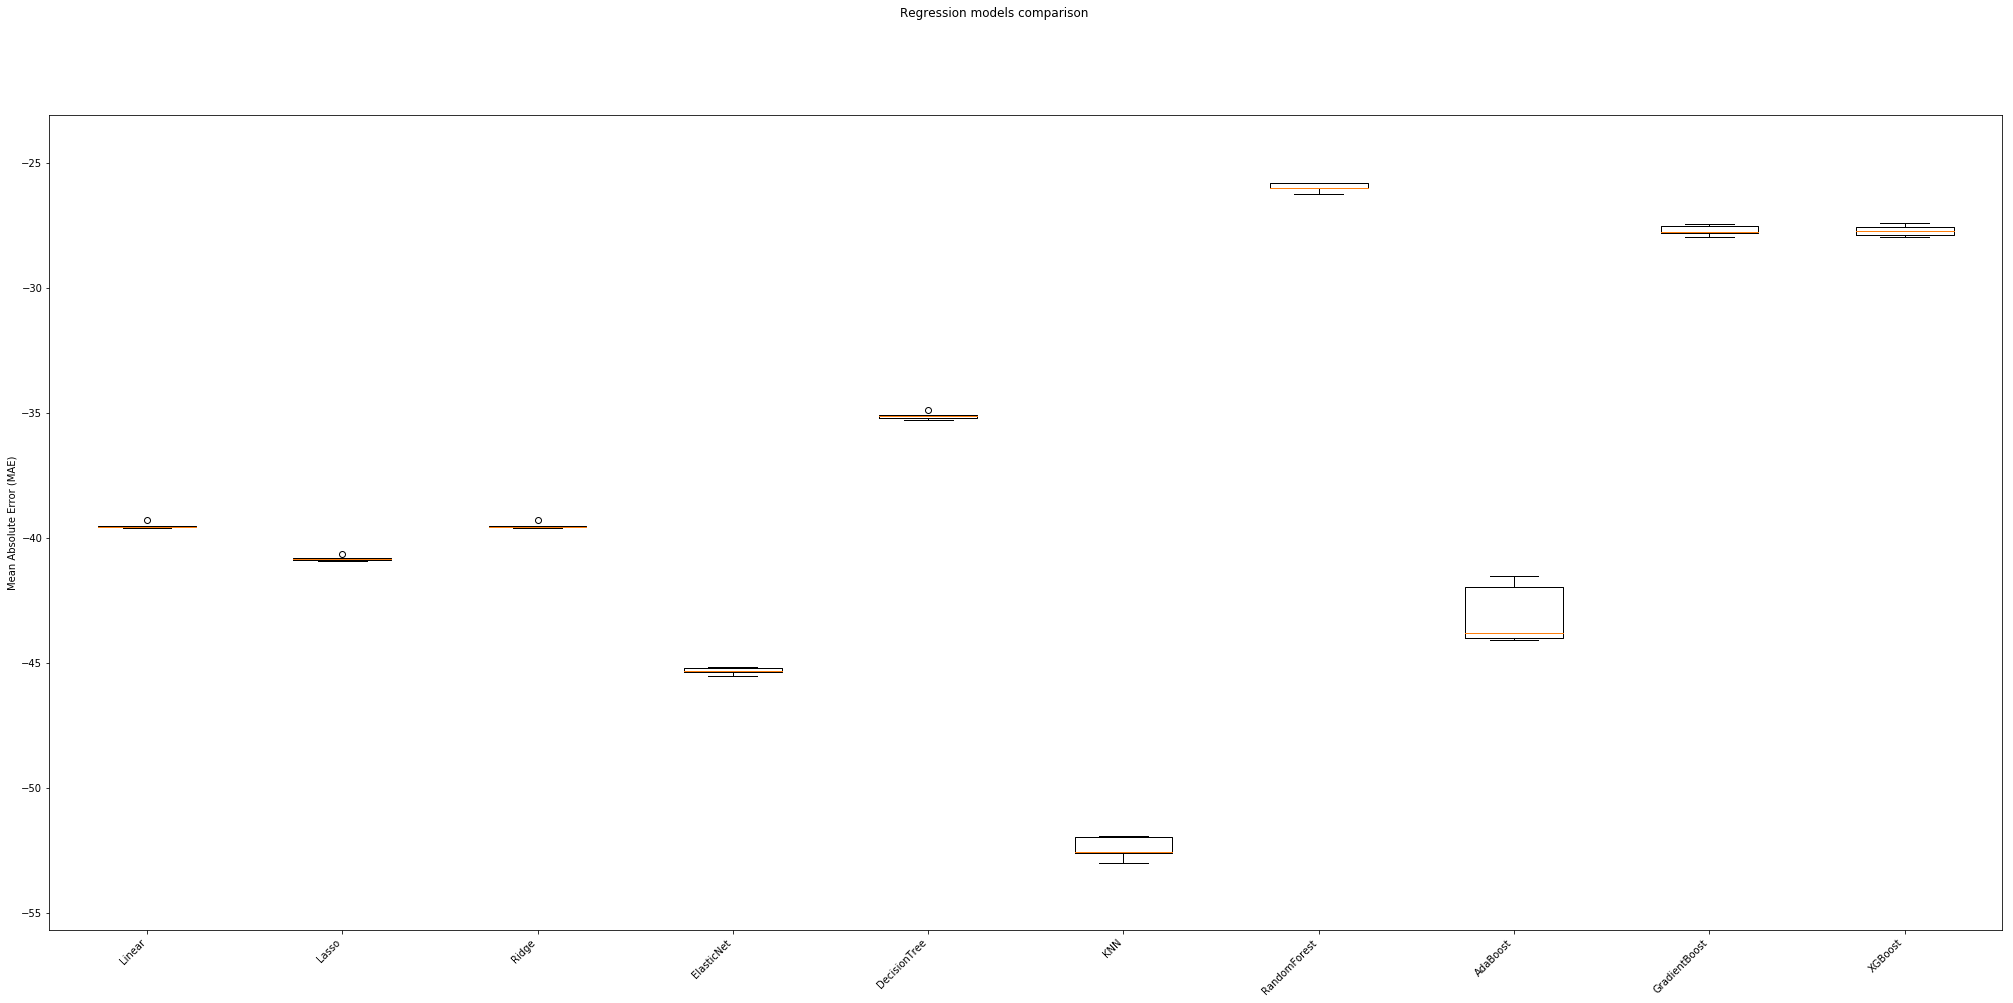

In [56]:
# box-whisker plot to compare regression models
import matplotlib.pyplot as plt 
figure = plt.figure(figsize = (35,15))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.margins(0.05, 0.1)

In [57]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  1.7863955360596369


In [58]:
model = RandomForestRegressor()
model.fit(X_test,Y_test)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
#train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
Y_test, test_predict = np.array(Y_test), np.array(test_predict)

MAPE - Mean Absolute Percentage Error (TEST DATA):  1.86429594791049


In [59]:
dtrain_predictions = model.predict(X_train)

In [60]:
#Print model report:
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(Y_train, dtrain_predictions)))
    
#Predict on testing data:
#test_final["res_linear"] =  model.predict(X_train)


Model Report
RMSE : 36.96
